In [4]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib + Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns   # https://seaborn.pydata.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('BDOShoham.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [6]:
# Let's set up a problem: Can we predict 'callSign' using these three features:  'Depth', 'Temperature', 'Salinity' ?

print('Reading list of problem variables X and Y...')
X_name = [ 'Vsl', 'Vsg', 'Ang' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features

y_name = 'FlowPattern'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



Summary of X - Univariate graphs

Histograms:


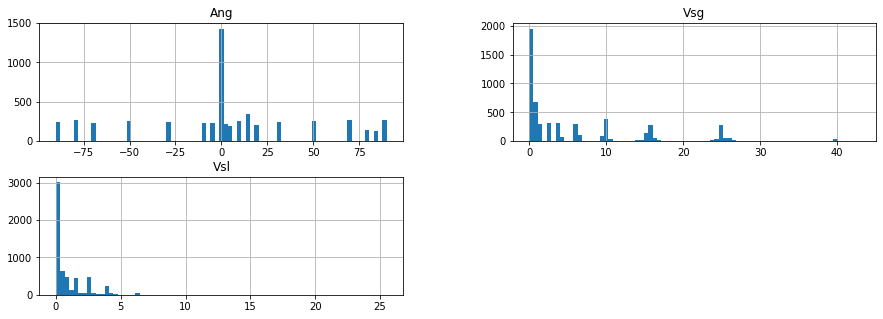

In [7]:
%matplotlib inline
import matplotlib.pyplot as pl  # https://matplotlib.org/

print('Summary of X - Univariate graphs')
print()

print('Histograms:')
X.hist(figsize=(15, 5), bins=75)  # bins ~= sqrt(N)
pl.show()


In [8]:
# Split data into training and testing datasets

test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # setting the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)

/project/dsi/apps/anaconda3/python-3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RESULTS FOR LR
Accuracy: 0.652863436123348


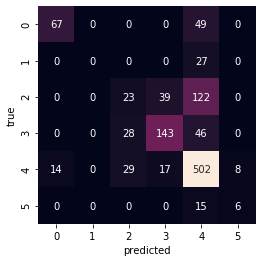

/project/dsi/apps/anaconda3/python-3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 clasification report:
               precision    recall  f1-score   support

           1       0.83      0.58      0.68       116
           2       0.00      0.00      0.00        27
           3       0.29      0.12      0.17       184
           4       0.72      0.66      0.69       217
           5       0.66      0.88      0.75       570
           7       0.43      0.29      0.34        21

    accuracy                           0.65      1135
   macro avg       0.49      0.42      0.44      1135
weighted avg       0.61      0.65      0.61      1135

Cohen Kappa Score: 0.43167925252458506


RESULTS FOR KNN-distance
Accuracy: 0.8546255506607929


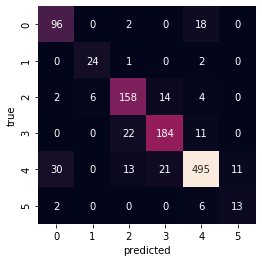


 clasification report:
               precision    recall  f1-score   support

           1       0.74      0.83      0.78       116
           2       0.80      0.89      0.84        27
           3       0.81      0.86      0.83       184
           4       0.84      0.85      0.84       217
           5       0.92      0.87      0.90       570
           7       0.54      0.62      0.58        21

    accuracy                           0.85      1135
   macro avg       0.77      0.82      0.80      1135
weighted avg       0.86      0.85      0.86      1135

Cohen Kappa Score: 0.7878442185779473


RESULTS FOR KNN-uniform
Accuracy: 0.8405286343612335


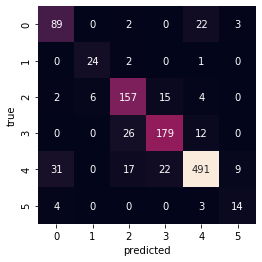


 clasification report:
               precision    recall  f1-score   support

           1       0.71      0.77      0.74       116
           2       0.80      0.89      0.84        27
           3       0.77      0.85      0.81       184
           4       0.83      0.82      0.83       217
           5       0.92      0.86      0.89       570
           7       0.54      0.67      0.60        21

    accuracy                           0.84      1135
   macro avg       0.76      0.81      0.78      1135
weighted avg       0.85      0.84      0.84      1135

Cohen Kappa Score: 0.7676166667609314




In [9]:
# Evaluate Some Classification Algorithms

# Now it is time to train some models on the data and estimate their accuracy on unseen data.

# Algorithms
models = []
models.append(('LR', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('KNN-distance', KNeighborsClassifier(n_neighbors=5, weights='distance'))) # default is n_neighbors=5, weights='uniform'
models.append(('KNN-uniform', KNeighborsClassifier(n_neighbors=5, weights='uniform'))) # default is n_neighbors=5, weights='uniform'

# evaluate each model in turn
results = []
names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))
    sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
    pl.xlabel('predicted')
    pl.ylabel('true');
    pl.show()
    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_predicted))
    print('\n')  

In [10]:
print('Reading list of scoring methods to use during model development ...')
scoring = 'accuracy'
print('done \n')

Reading list of scoring methods to use during model development ...
done 



In [11]:
seed = 42 # setting the seed allows for repeatability

print('Reading list of algorithms to train ...')
models= []
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight=None, solver='lbfgs', max_iter=250)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)))
print('done \n')

Reading list of algorithms to train ...
done 



In [12]:
# Split-out test dataset

# We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

# Train, test split
print('Partitioning data into parts: formative (for development) and summative (for testing) ...')
test_size = 0.20   # means 20 percent

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
print('done \n')

Partitioning data into parts: formative (for development) and summative (for testing) ...
done 



In [13]:
k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    
print('done \n')

 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 5 folds
Training model on each split


/project/dsi/apps/anaconda3/python-3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/project/dsi/apps/anaconda3/python-3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

algorithm LR accuracy results: mean = 0.662775 (std = 0.013478)
 ++ NOW WORKING ON ALGORITHM kNN ++
Splitting data into 5 folds
Training model on each split
algorithm kNN accuracy results: mean = 0.832379 (std = 0.015628)
done 



 ++++ Detailed classification report for the selected model ++++ 
Algorithm KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


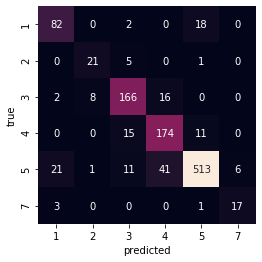


 clasification report:
               precision    recall  f1-score   support

           1       0.76      0.80      0.78       102
           2       0.70      0.78      0.74        27
           3       0.83      0.86      0.85       192
           4       0.75      0.87      0.81       200
           5       0.94      0.87      0.90       593
           7       0.74      0.81      0.77        21

    accuracy                           0.86      1135
   macro avg       0.79      0.83      0.81      1135
weighted avg       0.87      0.86      0.86      1135

Cohen Kappa Score: 0.7883915131036832


done 



In [14]:
# Make predictions on validation dataset for KNN model
selected_model = KNeighborsClassifier()
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')

          Vsl       Vsg   Ang
4969  0.40429   0.01677 -70.0
1071  0.63000   4.00000  -5.0
718   4.00000   0.63000   5.0
5650  0.41059  10.31910 -80.0
670   0.00250   2.50000   5.0
...       ...       ...   ...
3772  0.10000   1.00000   5.0
5191  0.68984   0.02148 -90.0
5226  0.00991  38.49360  50.0
5390  0.09809   0.03961  70.0
860   4.00000   0.10000  -1.0

[4540 rows x 3 columns] 4969    3
1071    3
718     5
5650    4
670     5
       ..
3772    5
5191    5
5226    4
5390    5
860     1
Name: FlowPattern, Length: 4540, dtype: int64


/project/dsi/apps/anaconda3/python-3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 ++++ Detailed classification report for the selected model ++++ 
Algorithm KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance') 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


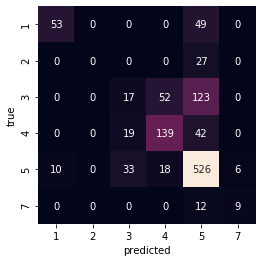


 clasification report:
               precision    recall  f1-score   support

           1       0.84      0.52      0.64       102
           2       0.00      0.00      0.00        27
           3       0.25      0.09      0.13       192
           4       0.67      0.69      0.68       200
           5       0.68      0.89      0.77       593
           7       0.60      0.43      0.50        21

    accuracy                           0.66      1135
   macro avg       0.50      0.44      0.45      1135
weighted avg       0.60      0.66      0.61      1135

Cohen Kappa Score: 0.41950113082071816


done 



/project/dsi/apps/anaconda3/python-3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Make predictions on validation dataset for LogisticRegresssion model
selected_model2 = LogisticRegression()
print (X_train, y_train)
selected_model2.fit(X_train, y_train)
predictions = selected_model2.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model2.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')

In [26]:
# We can do a similar process to chose between different hyperparameters for a model

parameters = {'n_neighbors':[3, 4, 5, 6], 'weights':['uniform','distance']}
clf = GridSearchCV(selected_model, parameters, cv=5, scoring=scoring)
print (X_train, y_train)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('\n')

print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full test set.")
print('\n')
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print('done \n')

          Vsl       Vsg   Ang
4969  0.40429   0.01677 -70.0
1071  0.63000   4.00000  -5.0
718   4.00000   0.63000   5.0
5650  0.41059  10.31910 -80.0
670   0.00250   2.50000   5.0
...       ...       ...   ...
3772  0.10000   1.00000   5.0
5191  0.68984   0.02148 -90.0
5226  0.00991  38.49360  50.0
5390  0.09809   0.03961  70.0
860   4.00000   0.10000  -1.0

[4540 rows x 3 columns] 4969    3
1071    3
718     5
5650    4
670     5
       ..
3772    5
5191    5
5226    4
5390    5
860     1
Name: FlowPattern, Length: 4540, dtype: int64
Best parameters set found on development set:
{'n_neighbors': 3, 'weights': 'distance'}
Grid scores on development set:
0.848 (+/-0.016) for {'n_neighbors': 3, 'weights': 'uniform'}
0.858 (+/-0.024) for {'n_neighbors': 3, 'weights': 'distance'}
0.831 (+/-0.017) for {'n_neighbors': 4, 'weights': 'uniform'}
0.855 (+/-0.020) for {'n_neighbors': 4, 'weights': 'distance'}
0.839 (+/-0.009) for {'n_neighbors': 5, 'weights': 'uniform'}
0.854 (+/-0.011) for {'n_ne

 ++++ Detailed classification report for the selected model ++++ 
Algorithm KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance') 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


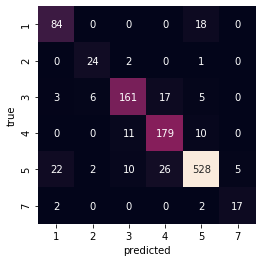


 clasification report:
               precision    recall  f1-score   support

           1       0.76      0.82      0.79       102
           2       0.75      0.89      0.81        27
           3       0.88      0.84      0.86       192
           4       0.81      0.90      0.85       200
           5       0.94      0.89      0.91       593
           7       0.77      0.81      0.79        21

    accuracy                           0.87      1135
   macro avg       0.82      0.86      0.84      1135
weighted avg       0.88      0.87      0.88      1135

Cohen Kappa Score: 0.81289695691998


done 



In [27]:
# Make predictions on validation dataset for KNN model
selected_model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', p=2)
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')

In [28]:
#We have seen from the confusion matrix, f1 score and cohen kappa score increases
#for KNN model, which is the best model (better than Logstic regression modek) using 
#the best parameters (hyperparameters) from the othe models. So, it can be concluded 
#that this model is a better fit for the testing data.
